In [1]:
# Random Forest Classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url='https://raw.githubusercontent.com/cagriemreakin/Machine-Learning/master/2%20-%20Classification/7-%20Random%20Forest%20Classification/sosyal_ag_reklamlari.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
# Eğitim ve test set olarak ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

C:\Users\ceakn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [5]:
# Modelimizi training set' e göre eğitme
from sklearn.ensemble import RandomForestClassifier

'''
n_estimators: Decision Tree sayısı
criterion: Gini, yanlış sınıflardırmayı minimize eder.
           Entropy keşif analizi yapar.Biraz daha yavaş çalışır.
'''
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [6]:
# Test setine göre sonuçları tahmin etme
y_pred = classifier.predict(X_test_scaled)

In [7]:
# Confusion Matrix ile hatalı tahminleri bulma
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 2, 20]])

In [8]:
from sklearn.metrics import accuracy_score
print("Doğruluk oranı: %",accuracy_score(y_test,y_pred)*100)

Doğruluk oranı: % 93.75


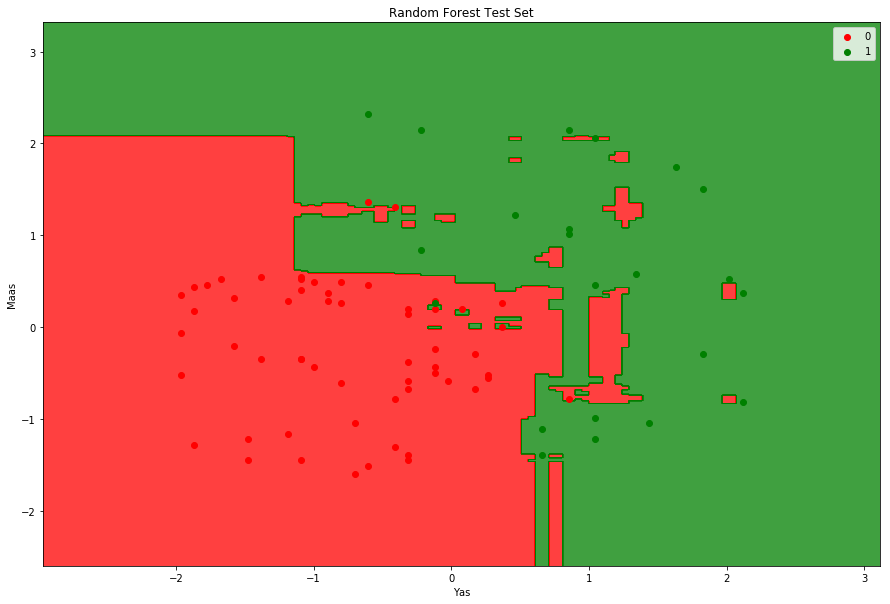

In [9]:
# Test set tahminlerinin görselleştirilmesi
from matplotlib.colors import ListedColormap
plt.figure(figsize=(15,10))
X_set, y_set = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Test Set')
plt.xlabel('Yas')
plt.ylabel('Maas')
plt.legend()
plt.show()